In [169]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer  

In [170]:
data = pd.read_csv('dataset.csv')

In [171]:
data

,title,Journal,category
0,Glendale college professor using magic to stir...,Arizona's Family,psychology
1,Are Wise People Happier?,Psychology Today,psychology
2,You need to detach and ‘psychologically recove...,Fortune,psychology
3,'Dark Psychology' TikTok Is Just Pickup Artist...,VICE,psychology
4,"New study links ""catfishing"" to heightened lev...",PsyPost,psychology
...,...,...,...
2686,'I want to democratise feminist literature': a...,The Guardian,literature
2687,Exhibition showcases preservation of Van Mieu ...,http://en.vietnamplus.vn/,literature
2688,Why this University of Delhi grad left India f...,Study International News,literature
2689,Paraurethral Endometriosis as a Common Patholo...,Cureus,literature


# convert text to lower case

In [172]:
data['title'] = [ title.lower() for title in data['title']]

In [173]:
data.head()

,title,Journal,category
0,glendale college professor using magic to stir...,Arizona's Family,psychology
1,are wise people happier?,Psychology Today,psychology
2,you need to detach and ‘psychologically recove...,Fortune,psychology
3,'dark psychology' tiktok is just pickup artist...,VICE,psychology
4,"new study links ""catfishing"" to heightened lev...",PsyPost,psychology


# pretraitement des données

In [174]:
import string
string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [175]:
data['title'] = data['title'].apply(lambda x:remove_punctuation(x))

In [176]:
data.head()

,title,Journal,category
0,glendale college professor using magic to stir...,Arizona's Family,psychology
1,are wise people happier,Psychology Today,psychology
2,you need to detach and ‘psychologically recove...,Fortune,psychology
3,dark psychology tiktok is just pickup artistry...,VICE,psychology
4,new study links catfishing to heightened level...,PsyPost,psychology


In [177]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data['title']= data['title'].apply(lambda x: tokenization(x))

In [178]:
data.head()

,title,Journal,category
0,[glendale college professor using magic to sti...,Arizona's Family,psychology
1,[are wise people happier],Psychology Today,psychology
2,[you need to detach and ‘psychologically recov...,Fortune,psychology
3,[dark psychology tiktok is just pickup artistr...,VICE,psychology
4,[new study links catfishing to heightened leve...,PsyPost,psychology


In [179]:
data.isna().sum()

title       0
Journal     0
category    0
dtype: int64

In [180]:
data.shape

(2691, 3)

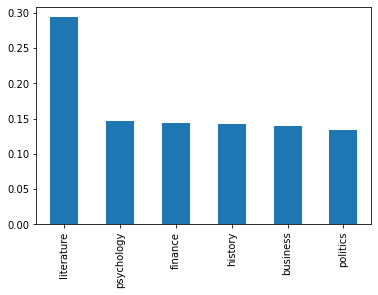

In [181]:
# check target balance

data['category'].value_counts(normalize = True).plot.bar()

In [182]:
data = data.loc[data['category'] != "literature" ]

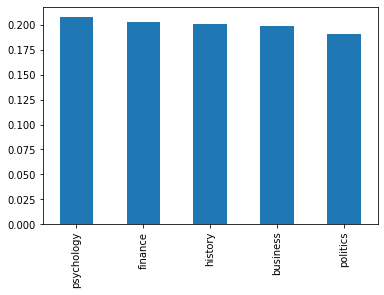

In [183]:
# check target balance

data['category'].value_counts(normalize = True).plot.bar()

In [184]:
# text preprocessing
# download nltk
import nltk

nltk.download('all')

# create a list text

text = list(data['title'])

# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(0,len(text)):

    r = re.sub("[^a-zA-Z]"," ", str(text[i]))

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words("english")]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = " ".join(r)

    corpus.append(r)

#assign corpus to data['text']

data['title'] = corpus

data.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

,title,Journal,category
0,glendale college professor using magic stir in...,Arizona's Family,psychology
1,wise people happier,Psychology Today,psychology
2,need detach psychologically recover work profe...,Fortune,psychology
3,dark psychology tiktok pickup artistry woman,VICE,psychology
4,new study link catfishing heightened level psy...,PsyPost,psychology


In [185]:
X = data['title']

y = data['category']

In [186]:
# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [187]:
print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (1273,)
Testing Data :  (628,)


In [188]:
X_train.values

array(['yearold lived year waitress run business make passive income',
       'chief play lobbyist pay get missouri kansa politician big game',
       'master critical management skill', ...,
       'lido finance kick yield farming event ethereum scaler',
       'michigan medicine name new chief financial officer university',
       'tip help new business owner worry le money'], dtype=object)

In [189]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train.values)

X_train_cv.shape

(1273, 2729)

# Building the model LogisticRegression

In [190]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train.values)

# transform X_test using CV

X_test_cv = cv.transform(X_test.values)

# generate predictions

predictions = lr.predict(X_test_cv)

##predictions

In [191]:
# confusion matrix

import pandas as pd

from sklearn import metrics

df = pd.DataFrame(metrics.confusion_matrix(y_test.values,predictions), index=['psychology', 'business', 'history', 'politics', 'finance'], columns=['psychology', 'business', 'history', 'politics', 'finance'])

df

,psychology,business,history,politics,finance
psychology,126,4,0,1,3
business,7,120,0,1,5
history,0,0,124,0,6
politics,1,0,0,102,11
finance,0,1,0,0,116


In [192]:
metrics.accuracy_score(y_test.values,predictions)

0.9363057324840764

In [193]:

X = X_test.values
print(X[1])
element = [X[1]]
X_test_cv = cv.transform( element )
# generate predictions



predictions = lr.predict(X_test_cv)
print("news: ",element," --> category: ",predictions)

financial composure assist accumulating wealth mint
news:  ['financial composure assist accumulating wealth mint']  --> category:  ['finance']


In [194]:
def clasify_news(text):
  print(text)
  element = [text]  
  X_test_cv = cv.transform( element )
  # generate predictions
  predictions = lr.predict(X_test_cv)
  return predictions

In [195]:
clasify_news("Houston Business Journal names 2023 Diversity in Business Awards honorees,Houston Business Journal")

Houston Business Journal names 2023 Diversity in Business Awards honorees,Houston Business Journal


array(['business'], dtype=object)

# Building the model Naive Bayes

In [196]:
# Training Logistic Regression model

from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

NB.fit(X_train_cv, y_train.values)

# transform X_test using CV

X_test_cv = cv.transform(X_test.values)

# generate predictions

predictions = NB.predict(X_test_cv)

##predictions

In [197]:
# confusion matrix

import pandas as pd

from sklearn import metrics

df = pd.DataFrame(metrics.confusion_matrix(y_test.values,predictions), index=['psychology', 'business', 'history', 'politics', 'finance'], columns=['psychology', 'business', 'history', 'politics', 'finance'])

df

,psychology,business,history,politics,finance
psychology,123,9,1,1,0
business,9,120,0,2,2
history,1,0,124,1,4
politics,2,4,0,107,1
finance,0,2,1,1,113


In [198]:
metrics.accuracy_score(y_test.values,predictions)

0.9347133757961783

In [199]:
def clasify_news_nb(text):
  print(text)
  element = [text]  
  X_test_cv = cv.transform( element )
  # generate predictions
  predictions = NB.predict(X_test_cv)
  return predictions

In [200]:
clasify_news_nb("Houston Business Journal names 2023 Diversity in Business Awards honorees,Houston Business Journal")

Houston Business Journal names 2023 Diversity in Business Awards honorees,Houston Business Journal


array(['business'], dtype='<U10')